In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = "MS Gothic" # Use this font to avoid encoding error


## Train Data EDA

train.csv
    Data size : Around 100K samples
	Null: There is no nulls in this dataframe
    kind	野菜の種類
	date	日付
	amount	卸売数量合計（合計の意味は、複数産地のものがあればその合計をとっているの意味）
	mode_price	卸売価格中央値（中央値の意味は、複数産地のものがあればその中央値をとっているの意味）
	area	産地。複数産地のものが売られていた場合は"_"で結合



In [2]:
train_data = pd.read_csv('../data/train.csv')
train_data['date'] = pd.to_datetime(train_data['date'],format='%Y%m%d')
train_data

,kind,date,amount,mode_price,area
0,だいこん,2005-11-07,201445,735.0,千葉
1,だいこん,2005-11-08,189660,840.0,千葉_各地_青森
2,だいこん,2005-11-10,218166,735.0,千葉_各地_青森
3,だいこん,2005-11-11,182624,682.5,千葉_青森
4,だいこん,2005-11-12,220691,682.5,千葉_青森
...,...,...,...,...,...
97777,しめじ,2017-05-26,17231,48.5,新潟_長野
97778,しめじ,2017-05-27,17105,48.5,新潟_長野
97779,しめじ,2017-05-29,12406,48.5,新潟_長野
97780,しめじ,2017-05-30,12320,48.5,新潟_長野


In [3]:
train_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97782 entries, 0 to 97781
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   kind        97782 non-null  object        
 1   date        97782 non-null  datetime64[ns]
 2   amount      97782 non-null  int64         
 3   mode_price  97782 non-null  float64       
 4   area        97782 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 3.7+ MB


In [4]:
train_data.describe()

,amount,mode_price
count,97782.000000,97782.000000
mean,87095.257246,1341.207081
std,84438.195701,1304.031597
min,1.000000,18.500000
25%,21664.250000,227.000000
50%,58335.500000,1242.000000
75%,128100.750000,1890.000000
max,965216.000000,25920.000000


## Some unknown entries exists such as 'ニュージーランド_鹿児島'

In [5]:
# Unique Entries for each column + number of unique entities
for i in train_data.columns:
    print(i)
    print('Number of unique entries :', train_data[f"{i}"].nunique())
    print(train_data[f"{i}"].unique())

kind
Number of unique entries : 44
['だいこん' 'かぶ' 'にんじん' 'ごぼう' 'れんこん' 'キャベツ' 'レタス' 'はくさい' 'こまつな' 'ほうれんそう' 'ねぎ'
 'しゅんぎく' 'ブロッコリー' 'きゅうり' 'かぼちゃ' 'なす' 'トマト' 'ピーマン' 'じゃがいも' 'さつまいも' 'さといも'
 'たまねぎ' 'なましいたけ' 'セルリー' 'さやえんどう' 'なのはな' 'たけのこ' 'ふき' 'うど' 'そらまめ' 'アスパラガス'
 'ピース' 'とうもろこし' 'いんげん' 'えだまめ' 'うめ' 'まつたけ' 'オクラ' 'レイシにがうり' 'みずな' 'ミニトマト'
 'にら' 'えのきだけ' 'しめじ']
date
Number of unique entries : 4379
['2005-11-07T00:00:00.000000000' '2005-11-08T00:00:00.000000000'
 '2005-11-10T00:00:00.000000000' ... '2010-02-20T00:00:00.000000000'
 '2014-05-06T00:00:00.000000000' '2014-08-18T00:00:00.000000000']
amount
Number of unique entries : 74257
[201445 189660 218166 ...  15718  11117  11635]
mode_price
Number of unique entries : 1241
[735.  840.  682.5 ...  22.   18.5  46.5]
area
Number of unique entries : 266
['千葉' '千葉_各地_青森' '千葉_青森' '千葉_各地' '千葉_神奈川' '千葉_各地_神奈川' '神奈川' '千葉_各地_茨城'
 '千葉_茨城' '青森' '北海道_青森' '北海道_各地_青森' '北海道_各地' '北海道_千葉_各地' '各地_神奈川' '各地_青森'
 '各地' '北海道' '千葉_埼玉' '千葉_各地_埼玉' '各地_埼玉' '埼玉' '北海道_千葉' '千葉_徳島' '

Text(0.5, 1.0, 'Distribution of samples over time')

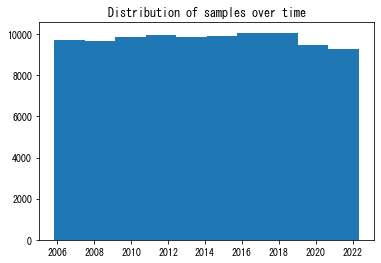

In [6]:
plt.hist(train_data['date'])
plt.title('Distribution of samples over time')

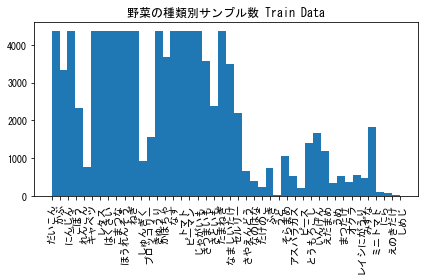

In [7]:
plt.hist(train_data['kind'], bins=train_data['kind'].nunique())
plt.xticks(rotation=90)
plt.title('野菜の種類別サンプル数 Train Data')
plt.tight_layout()

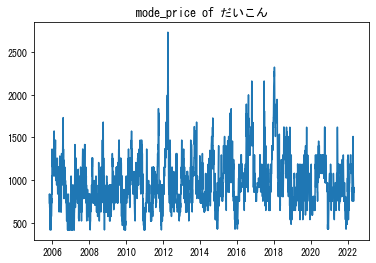

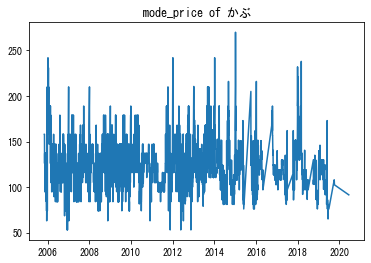

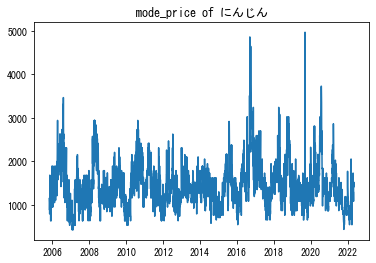

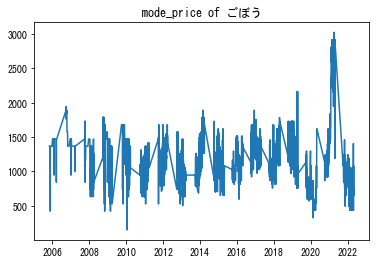

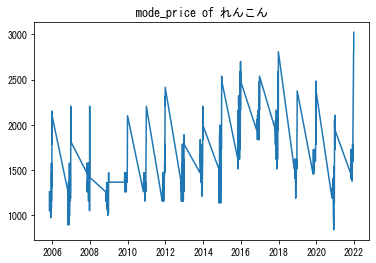

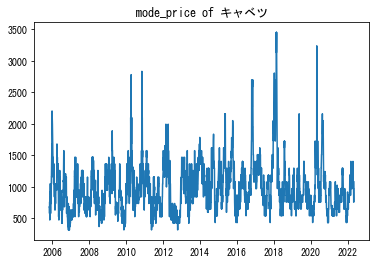

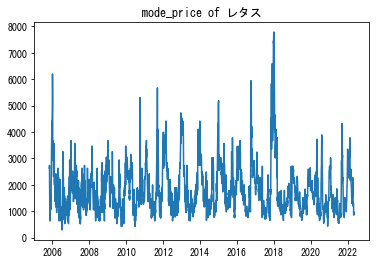

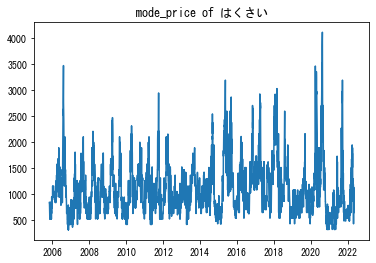

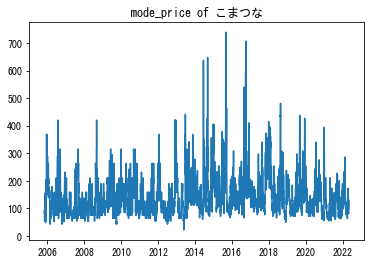

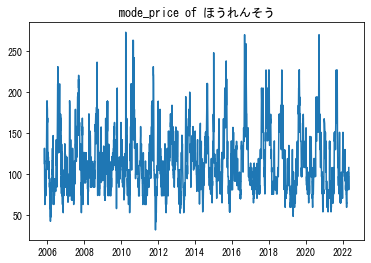

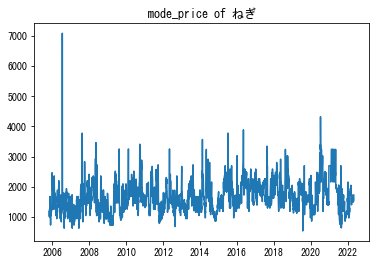

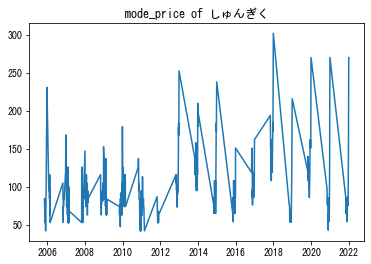

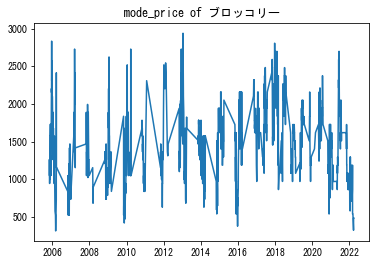

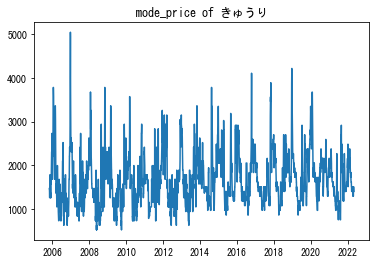

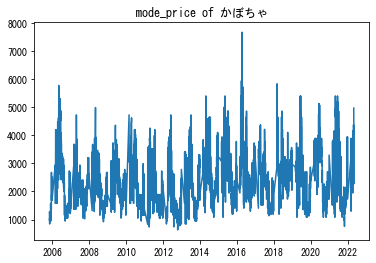

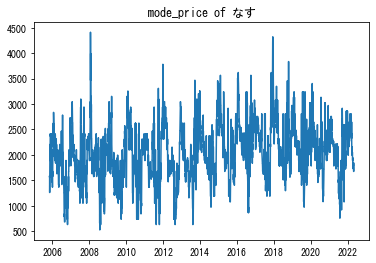

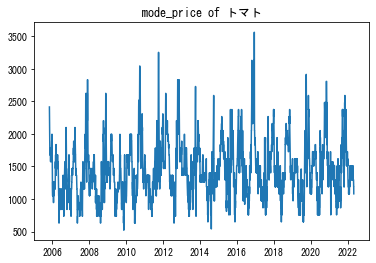

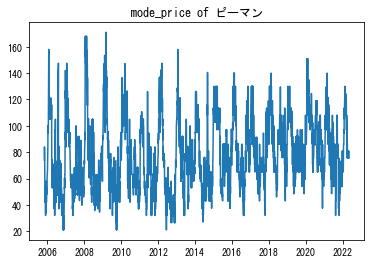

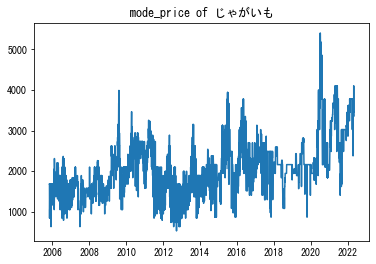

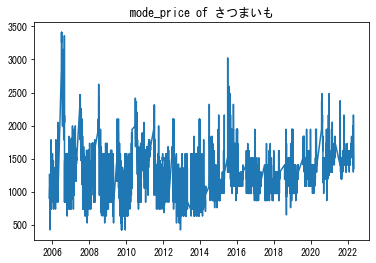

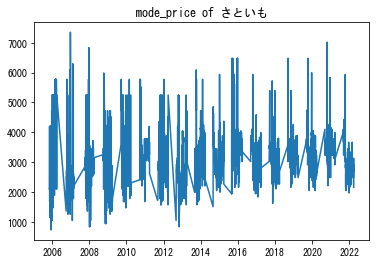

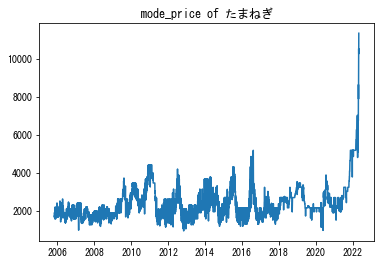

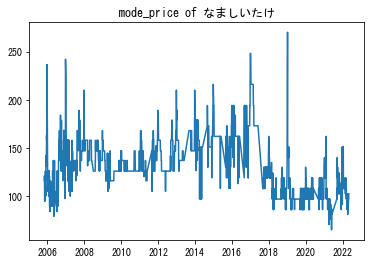

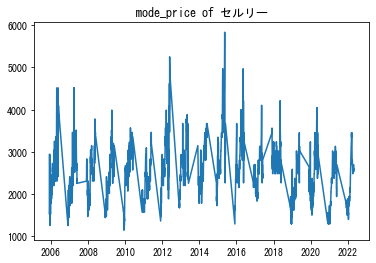

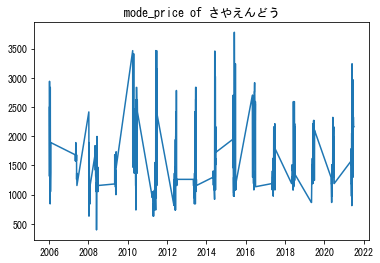

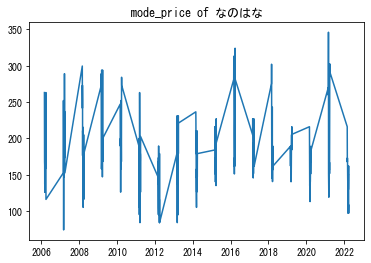

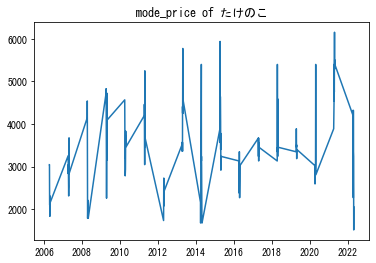

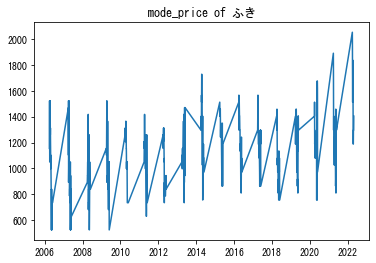

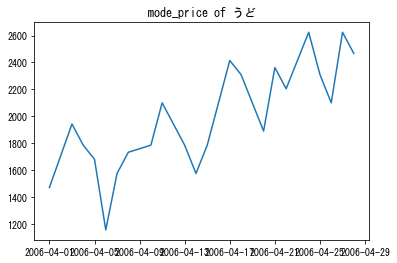

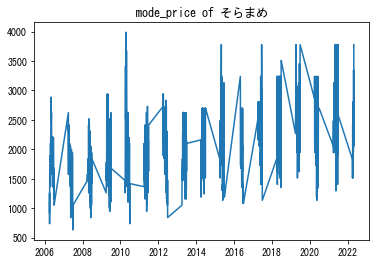

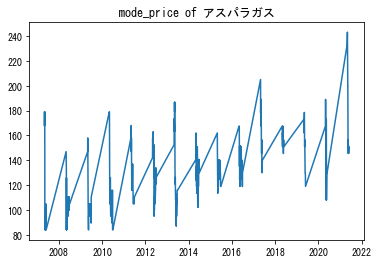

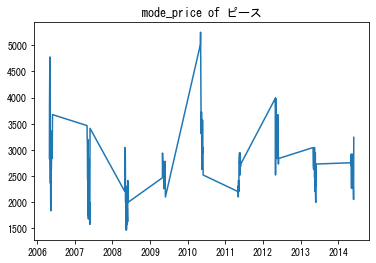

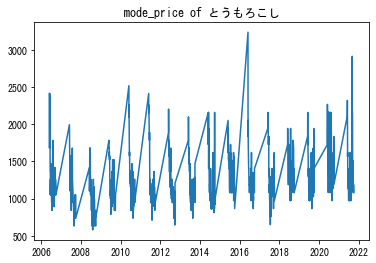

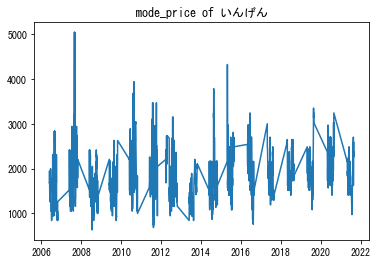

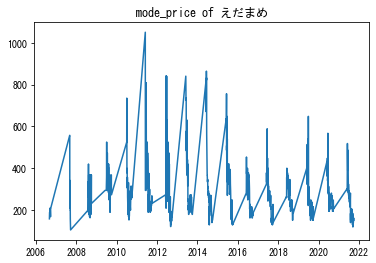

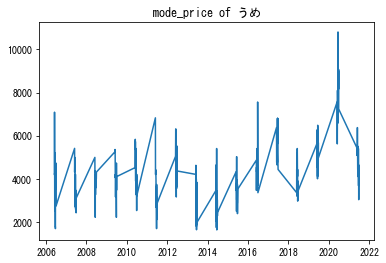

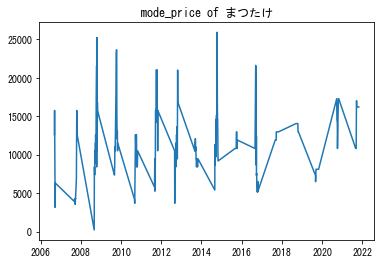

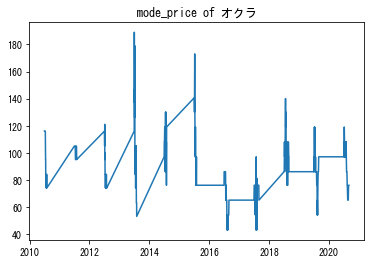

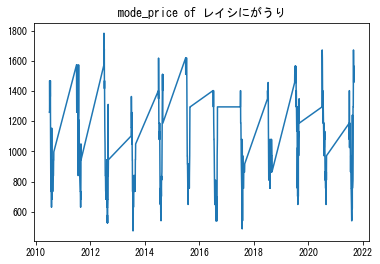

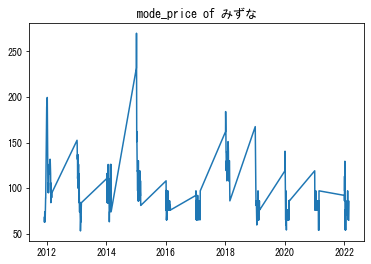

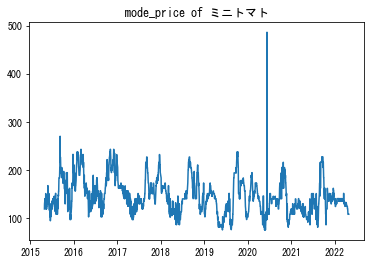

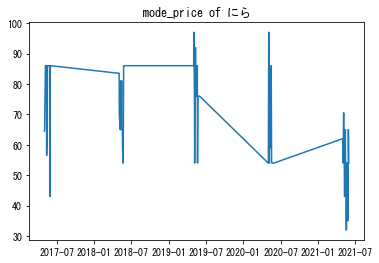

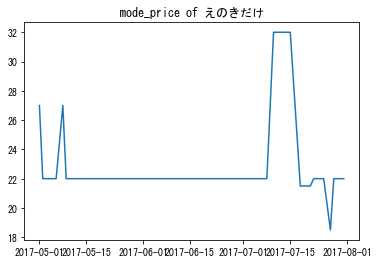

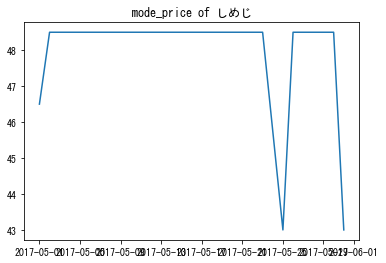

In [8]:
for i in train_data.kind.unique():
    plt.plot(train_data.query(f'kind == "{i}"').date,train_data.query(f'kind == "{i}"').mode_price)
    plt.title(f'mode_price of {i}')
    plt.show()